<a href="https://colab.research.google.com/github/lainey-reed/Textbook/blob/master/AC_Textbook_Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1: Introduction

This is the corresponding Colab document for the first chapter of the AguaClara textbook. 

In [ ]:
!pip install aguaclara

## Example: NYC Water Supply

The following code snippet is from the section titled [the Physics of Water Treatment Design: The Global Context for Drinking Water Treatment](https://aguaclara.github.io/Textbook/Introduction/Introduction.html#the-global-context-for-drinking-water-treatment)

In [ ]:
from aguaclara.core.units import unit_registry as u
import datetime
People_needing_water_2030 = 3.3*10**9
now = datetime.datetime.now()
Task_time = (2030 - now.year)*u.year
#If we assume we will meet this demand by building the same amount of new capacity each year, then we have
People_per_year = People_needing_water_2030/Task_time
People_per_year
#The percapita demand for water
Per_capita_demand = 3*u.mL/u.s
Per_capita_demand.to(u.L/u.day)
Per_capita_demand
Rate_new_water_supply_capacity = (People_per_year * Per_capita_demand).to(u.L/(u.s*u.year))
Rate_new_water_supply_capacity
NYC_water_supply = 44000 * u.L/u.s
NYC_per_year = Rate_new_water_supply_capacity/NYC_water_supply
NYC_per_year

25.0 1/year

## Example: Terminal Velocities of Particles of Differing Sizes

The following example is from [the Physics of Water Treatment Design: The AguaClara Treatment Train](https://aguaclara.github.io/Textbook/Introduction/Introduction.html#the-aguaclara-treatment-train)

/usr/local/lib/python3.7/dist-packages/aguaclara/core/physchem.py:157: UserWarning: viscosity_kinematic is deprecated; use viscosity_kinematic_water instead.
  'viscosity_kinematic_water instead.', UserWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/aguaclara/core/physchem.py:157: UserWarning: viscosity_kinematic is deprecated; use viscosity_kinematic_water instead.
  'viscosity_kinematic_water instead.', UserWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


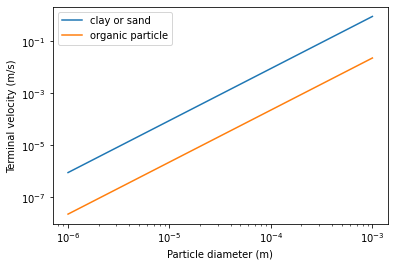

In [ ]:
import aguaclara.core.physchem as pc
import numpy as np
import matplotlib.pyplot as plt
#Note: original code has pc.gravity, changed to u.gravity
def v_t(D_particle,density_particle,Temperature):
  return (D_particle**2*u.gravity *(density_particle - pc.density_water(Temperature))/(18*pc.viscosity_kinematic(Temperature)*pc.density_water(Temperature))).to(u.m/u.s)
clay = 2650 * u.kg/u.m**3
organic = 1040 * u.kg/u.m**3
Temperature = 20 * u.degC
D_particle = np.logspace(-6,-3)*u.m
fig, ax = plt.subplots()
ax.loglog(D_particle.to(u.m),v_t(D_particle,clay,Temperature).to(u.m/u.s))
ax.loglog(D_particle.to(u.m),v_t(D_particle,organic,Temperature).to(u.m/u.s))
ax.set(xlabel='Particle diameter (m)', ylabel='Terminal velocity (m/s)')
ax.legend(["clay or sand","organic particle"])
#imagepath = 'Introduction/Images/'
#fig.savefig(imagepath+'Terminal_velocity')
plt.show()

## Example: AC Plant vs. Croton Water Treatment Plant

The following code is from [the Physics of Water Treatment Design: the Global Context for Drinking Water Treatment, Comparison with Croton Water Treatment Plant](https://aguaclara.github.io/Textbook/Introduction/Introduction.html#comparison-with-croton-water-treatment-plant)

In [ ]:
#the unit registry has been imported above and does not need to be imported again
import aguaclara
import aguaclara.core.physchem as pc
from aguaclara.core.units import unit_registry as u
Q_Croton =(290 *u.Mgal/u.day).to(u.L/u.s)
Cost_Croton = 3.2 * 10**9 * u.USD
Cost_per_Lps = Cost_Croton/Q_Croton
Cost_per_Lps
N_DAF = 48
Q_per_unit = Q_Croton/N_DAF
Q_per_unit/6
(15.9 * u.m/u.hr).to(u.mm/u.s)

4.416666666666667 millimeter/second